# Library

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
import lightgbm as lgb
from sklearn.model_selection import cross_validate, cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

import koreanize_matplotlib

# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

# Data Load

In [78]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
sub = pd.read_csv("sample.csv", index_col='Id')

print("train")
display(train.head(3))
print(train.shape)

print('-'*80)

print("test")
display(test.head(3))
print(test.shape)

print('-'*80)

display(sub.head(3))

train


,Id,Fabricante,Tipo,Pulgadas,ScreenResolution,CPU,RAM,Disco,GPU,OS,Peso,Precio
0,0,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.84kg,747.0
1,1,Acer,Notebook,15.6,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,8GB,1TB HDD,Nvidia GeForce MX150,Windows 10,2.2kg,422.0
2,2,HP,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,4GB,500GB HDD,AMD Radeon 530,Windows 10,2.1kg,422.0


(950, 12)
--------------------------------------------------------------------------------
test


,Id,Fabricante,Tipo,Pulgadas,ScreenResolution,CPU,RAM,Disco,GPU,OS,Peso
0,950,Asus,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2GHz,4GB,256GB SSD,Intel HD Graphics 520,Linux,2kg
1,951,HP,Notebook,15.6,1366x768,AMD E-Series 7110 1.8GHz,4GB,500GB HDD,AMD Radeon R2 Graphics,Windows 10,1.86kg
2,952,Lenovo,Gaming,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,No OS,2.4kg


(350, 11)
--------------------------------------------------------------------------------


,Unnamed: 0,Precio
Id,,
950,0,689.108462
951,1,689.108462
952,2,689.108462


# EDA

- train/test info & describe

In [3]:
display(train.info())
display(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 0 to 949
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id                950 non-null    int64  
 1   Fabricante        950 non-null    object 
 2   Tipo              950 non-null    object 
 3   Pulgadas          950 non-null    float64
 4   ScreenResolution  950 non-null    object 
 5   CPU               950 non-null    object 
 6   RAM               950 non-null    object 
 7   Disco             950 non-null    object 
 8   GPU               950 non-null    object 
 9   OS                950 non-null    object 
 10  Peso              950 non-null    object 
 11  Precio            950 non-null    float64
dtypes: float64(2), int64(1), object(9)
memory usage: 89.2+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id                350 non-null    int64  
 1   Fabricante        350 non-null    object 
 2   Tipo              350 non-null    object 
 3   Pulgadas          350 non-null    float64
 4   ScreenResolution  350 non-null    object 
 5   CPU               350 non-null    object 
 6   RAM               350 non-null    object 
 7   Disco             350 non-null    object 
 8   GPU               350 non-null    object 
 9   OS                350 non-null    object 
 10  Peso              350 non-null    object 
dtypes: float64(1), int64(1), object(9)
memory usage: 30.2+ KB


None

In [4]:
display(train.describe())
display(test.describe())
display(train.describe(include='object'))
display(test.describe(include='object'))

,Id,Pulgadas,Precio
count,950.000000,950.000000,950.000000
mean,474.500000,14.974421,684.927368
std,274.385677,1.451727,408.872239
min,0.000000,10.100000,107.000000
25%,237.250000,14.000000,379.000000
50%,474.500000,15.600000,603.000000
75%,711.750000,15.600000,912.000000
max,949.000000,18.400000,3368.000000


,Id,Pulgadas
count,350.000000,350.000000
mean,1124.500000,15.132857
std,101.180532,1.354767
min,950.000000,11.300000
25%,1037.250000,14.000000
50%,1124.500000,15.600000
75%,1211.750000,15.600000
max,1299.000000,17.300000


,Fabricante,Tipo,ScreenResolution,CPU,RAM,Disco,GPU,OS,Peso
count,950,950,950,950,950,950,950,950,950
unique,19,6,37,102,9,34,95,9,165
top,Dell,Notebook,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,2.2kg
freq,221,523,378,151,463,304,215,788,86


,Fabricante,Tipo,ScreenResolution,CPU,RAM,Disco,GPU,OS,Peso
count,350,350,350,350,350,350,350,350,350
unique,16,6,29,60,8,27,70,8,112
top,HP,Notebook,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,2.2kg
freq,80,201,129,43,156,108,66,281,34


- feature unique

In [5]:
feature = ['Fabricante', 'Tipo', 'ScreenResolution', 'CPU', 'RAM', 'Disco', 'GPU', 'OS', 'Peso']

for f in feature:
    print(f'{f} : \n {train[f].unique()} \n')

Fabricante : 
 ['HP' 'Acer' 'Google' 'MSI' 'Dell' 'Asus' 'Lenovo' 'Toshiba' 'Razer'
 'Fujitsu' 'LG' 'Apple' 'Microsoft' 'Xiaomi' 'Mediacom' 'Samsung' 'Vero'
 'Chuwi' 'Huawei'] 

Tipo : 
 ['Notebook' 'Ultrabook' 'Gaming' 'Netbook' '2 in 1 Convertible'
 'Workstation'] 

ScreenResolution : 
 ['Full HD 1920x1080' 'IPS Panel Full HD 1920x1080' '1366x768'
 'Touchscreen 2400x1600' 'Quad HD+ / Touchscreen 3200x1800'
 'IPS Panel 4K Ultra HD / Touchscreen 3840x2160' 'Touchscreen 1366x768'
 'IPS Panel Full HD / Touchscreen 1920x1080'
 'Full HD / Touchscreen 1920x1080' 'IPS Panel 1366x768'
 'IPS Panel Touchscreen 1920x1200' '4K Ultra HD / Touchscreen 3840x2160'
 '1600x900' 'IPS Panel Retina Display 2880x1800'
 'IPS Panel Retina Display 2560x1600' '4K Ultra HD 3840x2160' '1440x900'
 'IPS Panel Touchscreen 2560x1440' 'IPS Panel Touchscreen 1366x768'
 'IPS Panel 4K Ultra HD 3840x2160' 'Touchscreen 2256x1504'
 'IPS Panel Quad HD+ / Touchscreen 3200x1800' 'IPS Panel 2560x1440'
 'IPS Panel Full HD 1920x

- Check the null value

In [24]:
print('train :')
display(train.isnull().mean())

print('-'*80)

print('test :')
display(test.isnull().mean())

train :


Id                  0.0
Fabricante          0.0
Tipo                0.0
Pulgadas            0.0
ScreenResolution    0.0
CPU                 0.0
RAM                 0.0
Disco               0.0
GPU                 0.0
OS                  0.0
Peso                0.0
Precio              0.0
dtype: float64

--------------------------------------------------------------------------------
test :


Id                  0.0
Fabricante          0.0
Tipo                0.0
Pulgadas            0.0
ScreenResolution    0.0
CPU                 0.0
RAM                 0.0
Disco               0.0
GPU                 0.0
OS                  0.0
Peso                0.0
dtype: float64

- visualization

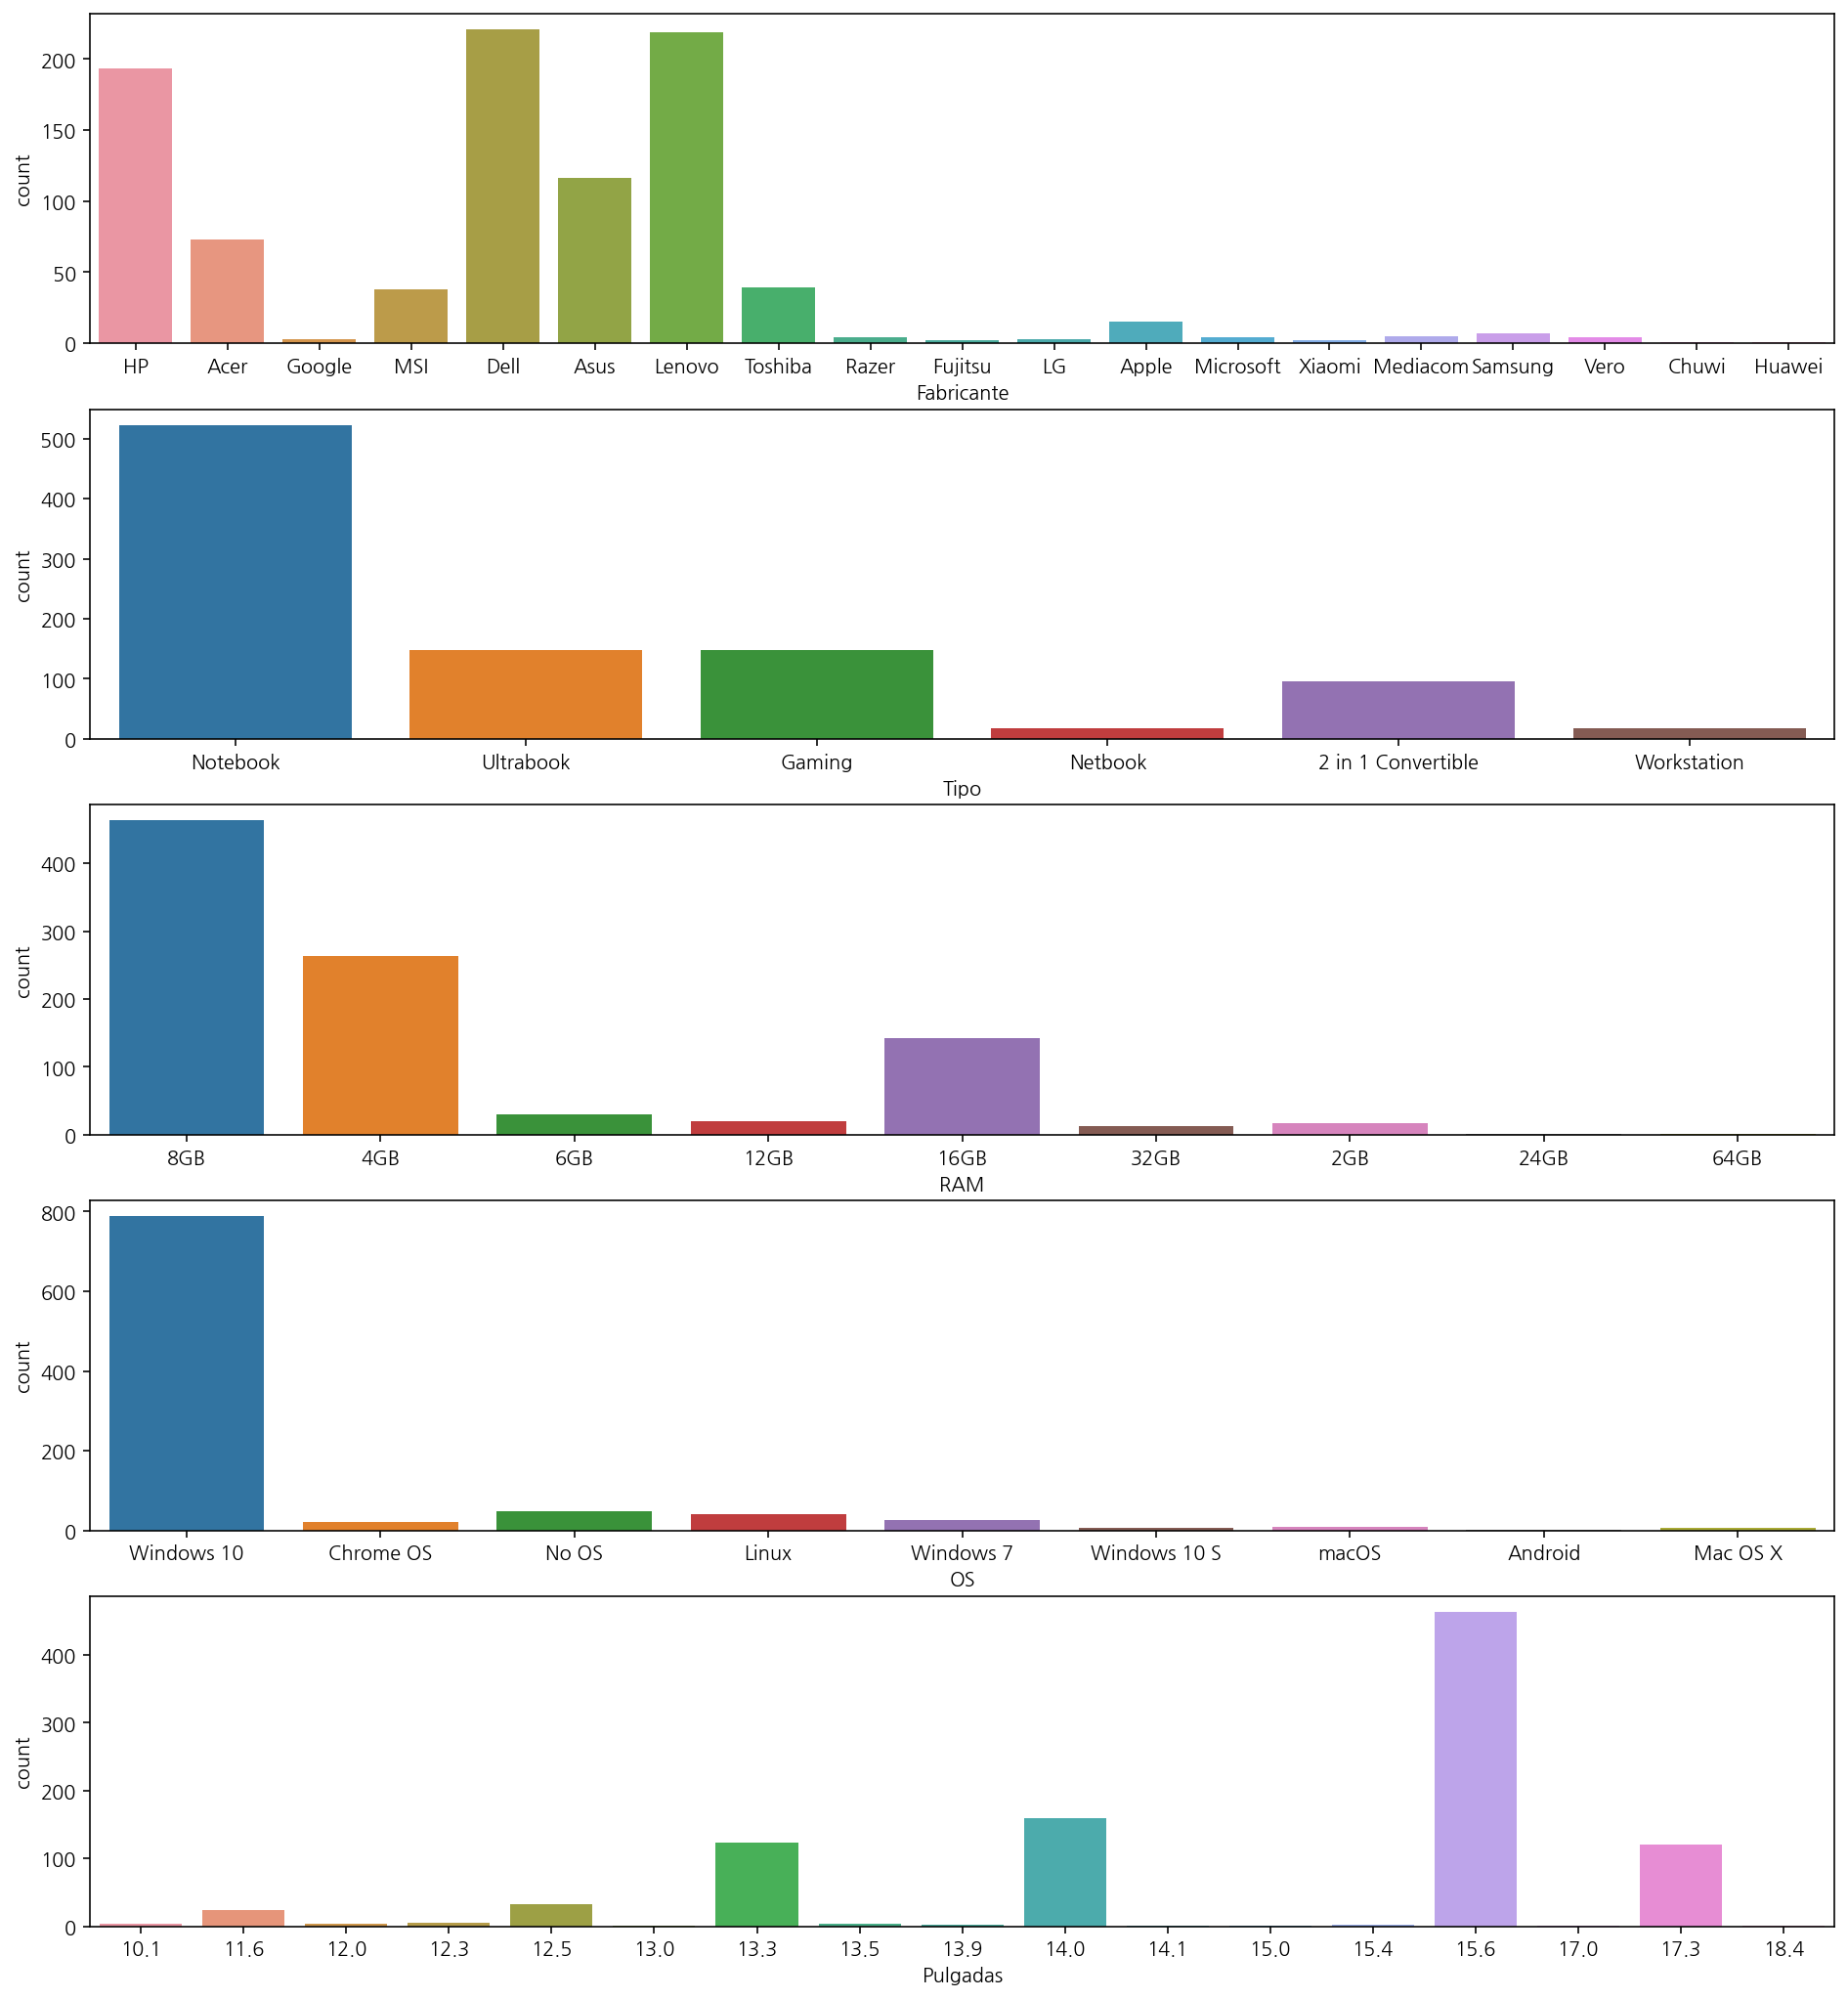

In [30]:
fig, axes = plt.subplots(5, 1, figsize=(16,18))

_=sns.countplot(data=train, x='Fabricante', ax=axes[0])
_=sns.countplot(data=train, x='Tipo', ax=axes[1])
_=sns.countplot(data=train, x='RAM', ax=axes[2])
_=sns.countplot(data=train, x='OS', ax=axes[3])
_=sns.countplot(data=train, x='Pulgadas', ax=axes[4])

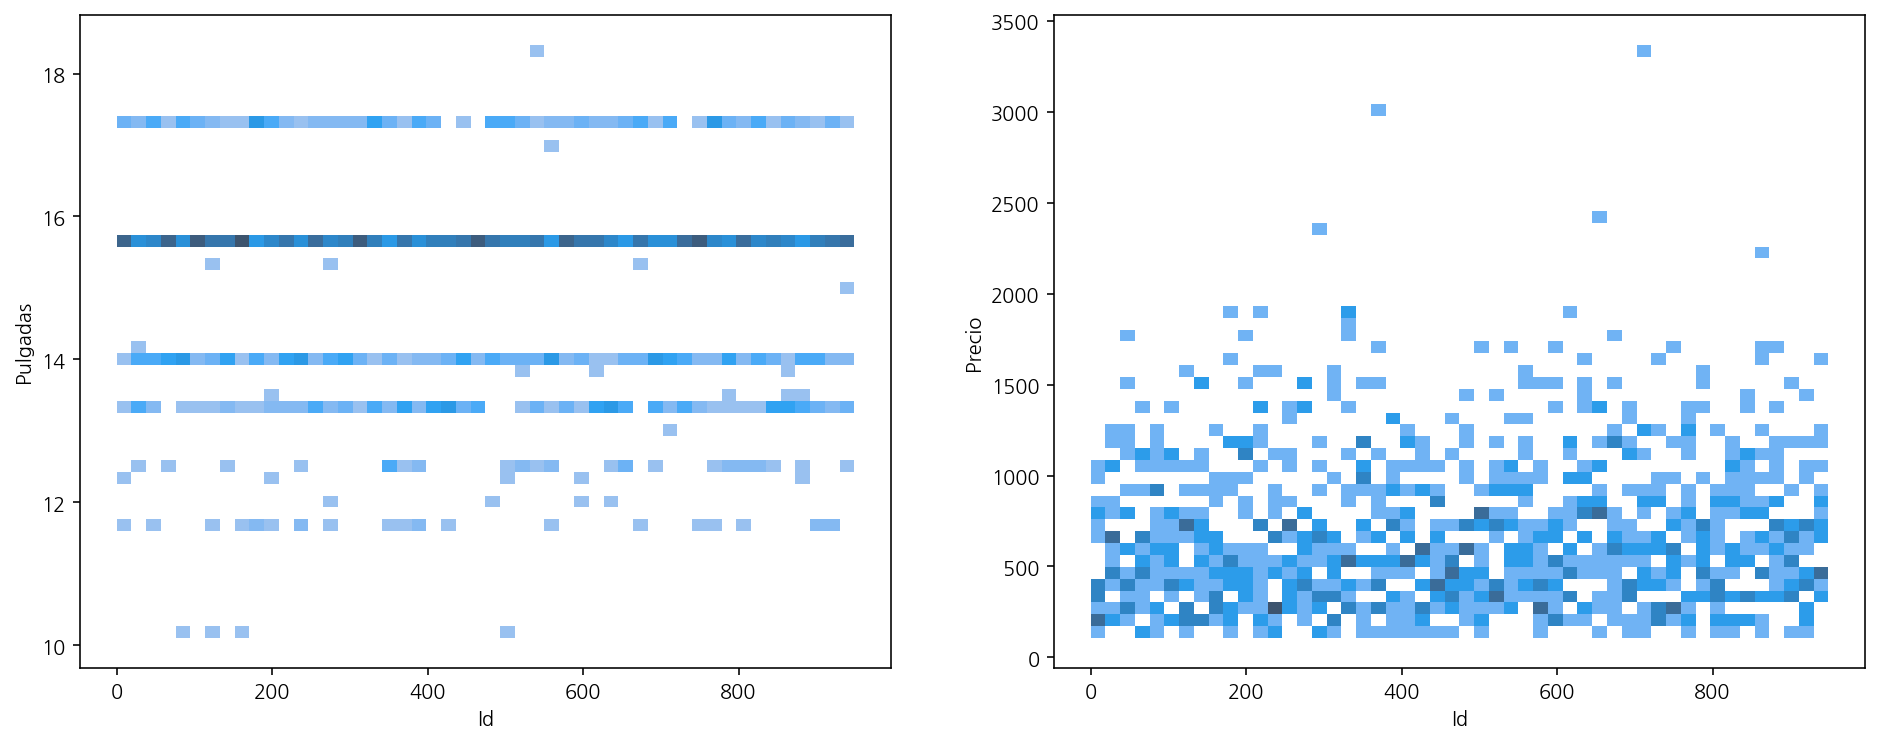

In [85]:
fig, axes = plt.subplots(1, 2, figsize=(16,6))

_=sns.histplot(data=train, x='Id', y='Pulgadas', ax=axes[0], bins=50)
_=sns.histplot(data=train, x='Id', y='Precio', ax=axes[1], bins=50)

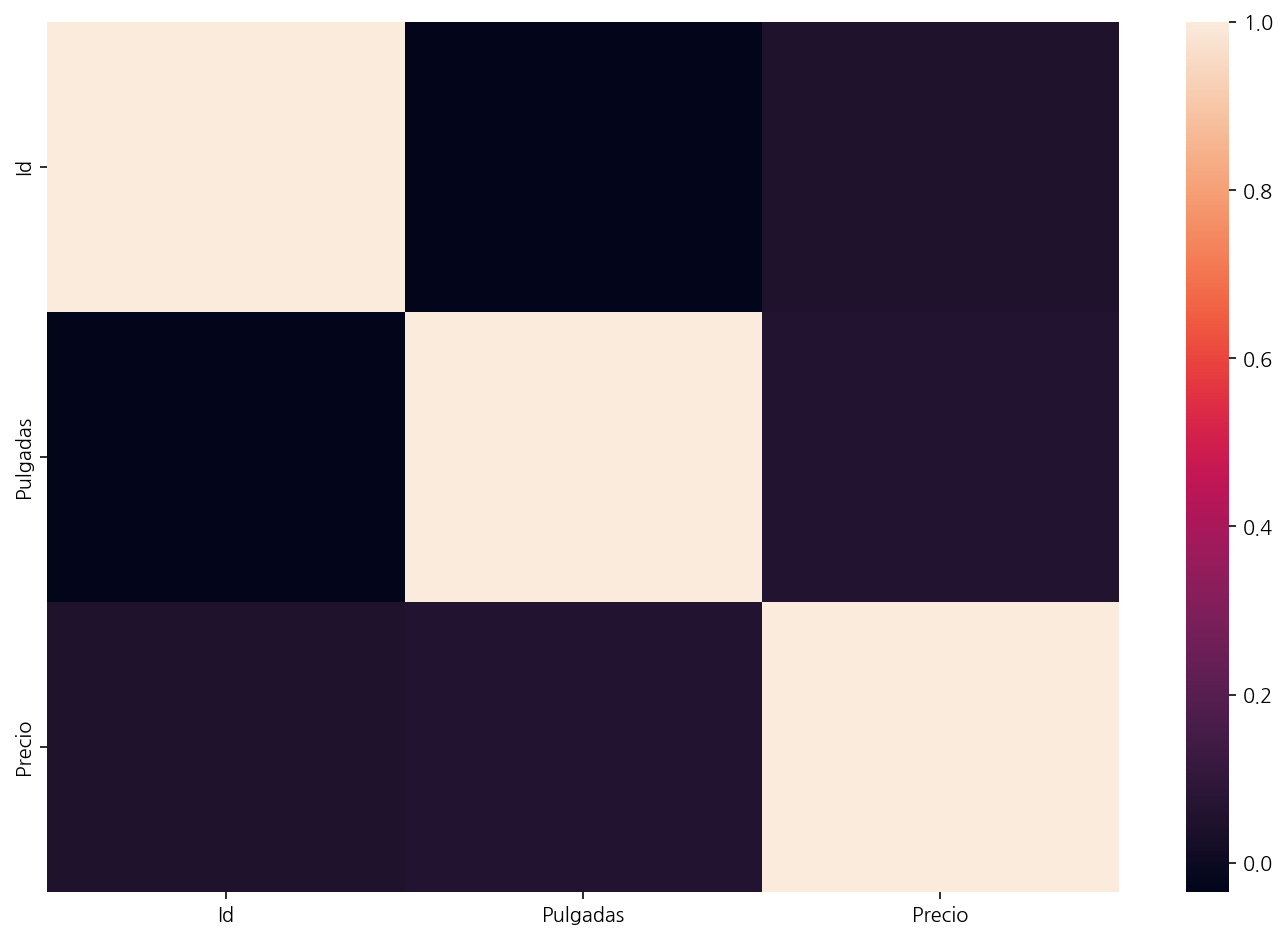

In [86]:
plt.figure(figsize=(12,8))
_=sns.heatmap(data=train.corr())

# Preprocessing

- Peso feature : Except kg.

In [87]:
# train
Peso_kg1 = []
for p1 in train['Peso']:
    Peso_kg1.append(p1[:-2])
    
train['Peso'] = Peso_kg1

# test
Peso_kg2 = []
for p2 in test['Peso']:
    Peso_kg2.append(p2[:-2])
    
test['Peso'] = Peso_kg2

display(train['Peso'])
display(test['Peso'])

0      1.84
1       2.2
2       2.1
3       2.4
4      2.04
       ... 
945    2.14
946    1.48
947     1.2
948     2.3
949    2.04
Name: Peso, Length: 950, dtype: object

0         2
1      1.86
2       2.4
3       2.7
4      1.95
       ... 
345    2.19
346    1.05
347    1.91
348     2.1
349       2
Name: Peso, Length: 350, dtype: object

- RAM feature : Except GB

In [88]:
# train
RAM_GB1 = []
for r1 in train['RAM']:
    RAM_GB1.append(r1[:-2])
    
train['RAM'] = RAM_GB1

# test
RAM_GB2 = []
for r2 in test['RAM']:
    RAM_GB2.append(r2[:-2])
    
test['RAM'] = RAM_GB2

display(train['RAM'])
display(test['RAM'])

0      8
1      8
2      4
3      4
4      6
      ..
945    8
946    4
947    8
948    8
949    8
Name: RAM, Length: 950, dtype: object

0      4
1      4
2      8
3      8
4      4
      ..
345    6
346    8
347    8
348    4
349    8
Name: RAM, Length: 350, dtype: object

- LabelEncoder

In [89]:
le = LabelEncoder()
feature_encoder = ['Fabricante', 'Tipo', 'ScreenResolution', 'CPU', 'Disco', 'GPU', 'OS']
# train
for e  in feature_encoder:
    train[e] = le.fit_transform(train[e]) 
    test[e] = le.fit_transform(test[e])

In [90]:
feature_astype = ['RAM', 'Peso']

for a in feature_astype:
    train[a] = train[a].astype(float)
    test[a] = test[a].astype(float)

- Drop id column

In [91]:
train = train.drop('Id', axis=1)
test = test.drop('Id', axis=1)

print('----------train----------')
display(train.head(3))
print('----------test----------')
display(test.head(3))

----------train----------


,Fabricante,Tipo,Pulgadas,ScreenResolution,CPU,RAM,Disco,GPU,OS,Peso,Precio
0,7,3,15.6,8,83,8.0,14,45,5,1.84,747.0
1,0,3,15.6,8,92,8.0,9,87,5,2.20,422.0
2,7,3,15.6,14,83,4.0,23,6,5,2.10,422.0


----------test----------


,Fabricante,Tipo,Pulgadas,ScreenResolution,CPU,RAM,Disco,GPU,OS,Peso
0,2,3,15.6,7,26,4.0,13,27,1,2.00
1,6,3,15.6,0,12,4.0,20,5,4,1.86
2,8,1,15.6,13,51,8.0,15,49,3,2.40


- Visualization

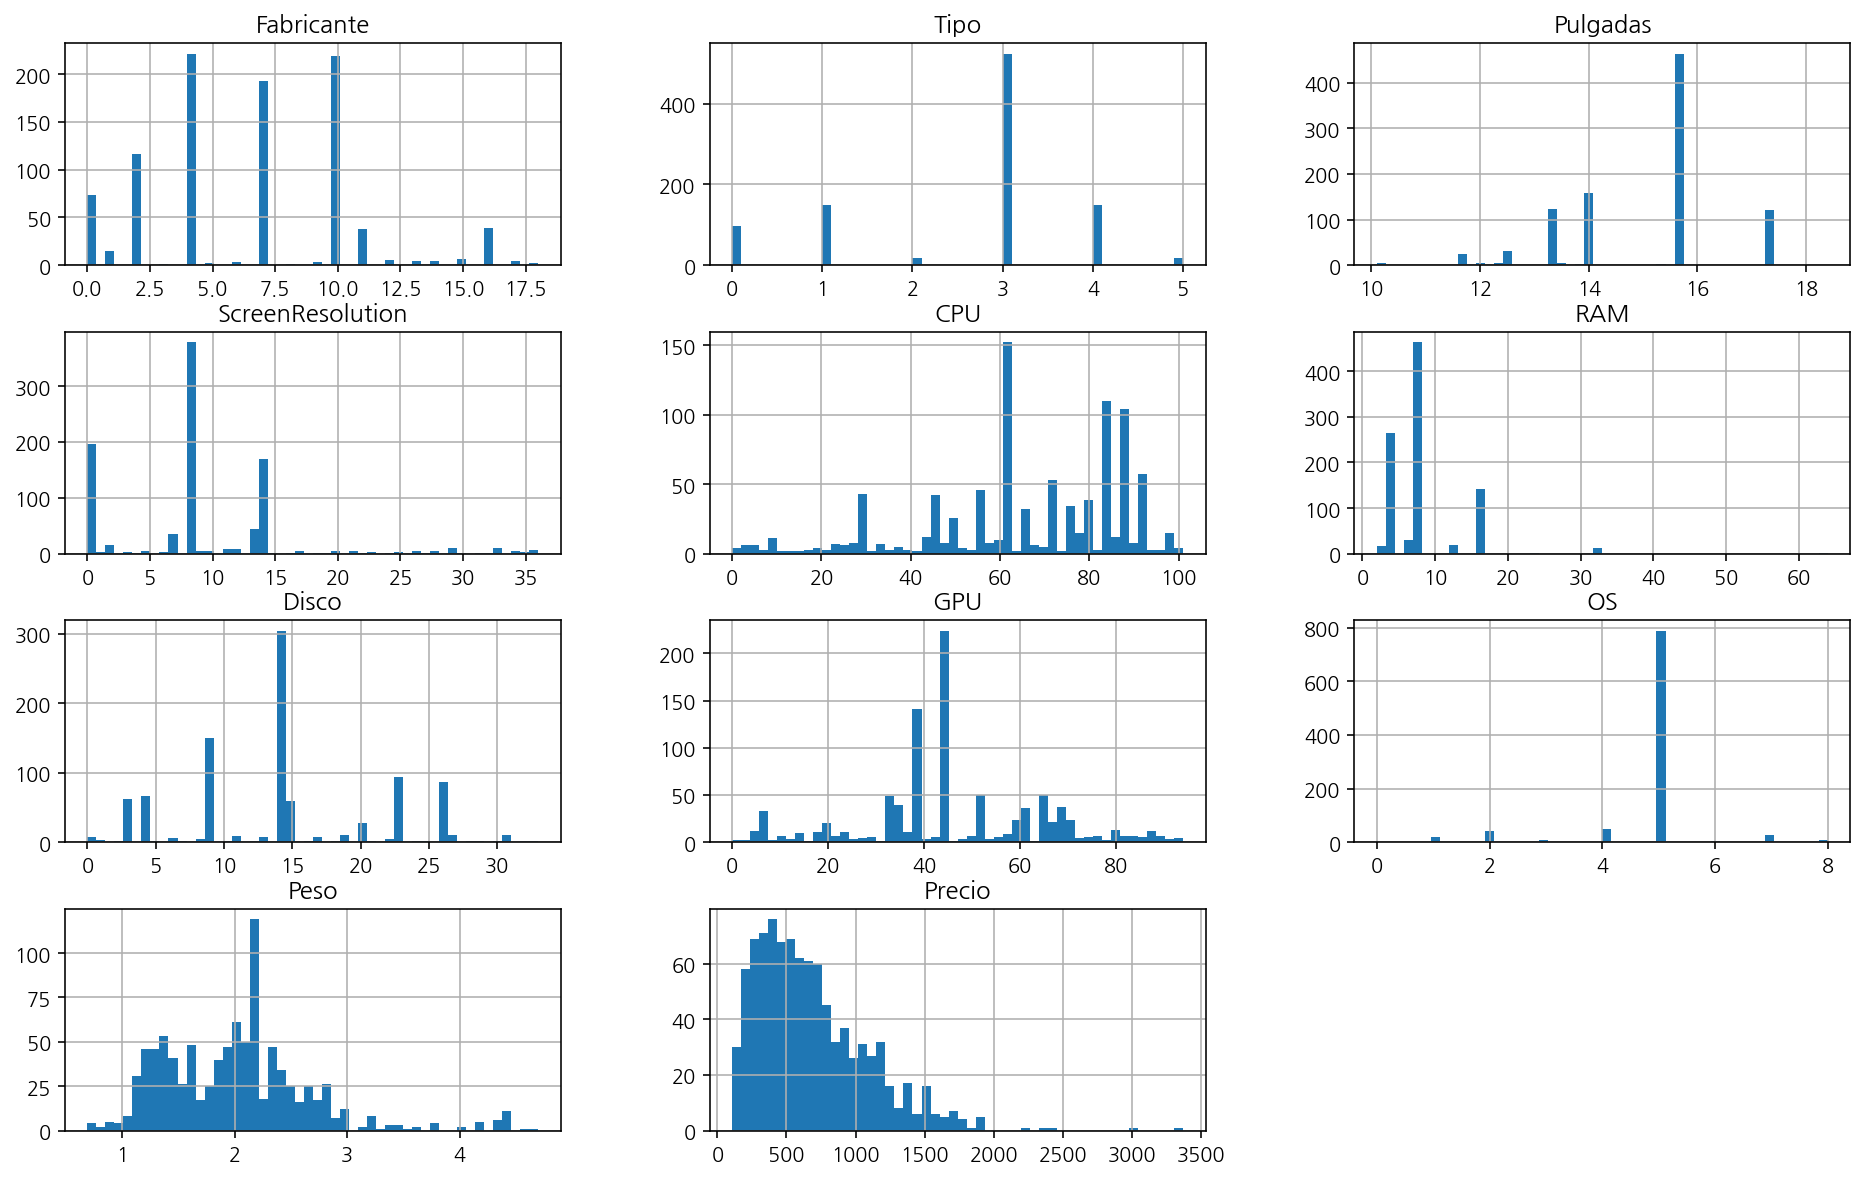

In [96]:
_=train.hist(figsize=(16,10), bins=50)

# Modeling

- train/test split

In [37]:
label_name = 'Precio'

X_train = train.iloc[:, :-1]
y_train = train[label_name]
X_test = test

print('----------X_train----------')
display(X_train)

print('----------y_train----------')
display(y_train)

print('----------X_test----------')
display(X_test)

----------X_train----------


,Fabricante,Tipo,Pulgadas,ScreenResolution,CPU,RAM,Disco,GPU,OS,Peso
0,7,3,15.6,8,83,8.0,14,45,5,1.84
1,0,3,15.6,8,92,8.0,9,87,5,2.20
2,7,3,15.6,14,83,4.0,23,6,5,2.10
3,0,3,15.6,0,8,4.0,23,15,5,2.40
4,7,3,15.6,8,9,6.0,0,22,5,2.04
...,...,...,...,...,...,...,...,...,...,...
945,4,3,15.6,0,62,8.0,9,45,5,2.14
946,7,4,14.0,8,68,4.0,14,45,5,1.48
947,16,3,13.3,8,56,8.0,14,39,5,1.20
948,4,3,15.6,0,83,8.0,9,20,2,2.30


----------y_train----------


0      747.0
1      422.0
2      422.0
3      237.0
4      337.0
       ...  
945    331.0
946    663.0
947    743.0
948    494.0
949    385.0
Name: Precio, Length: 950, dtype: float64

----------X_test----------


,Fabricante,Tipo,Pulgadas,ScreenResolution,CPU,RAM,Disco,GPU,OS,Peso
0,2,3,15.6,7,26,4.0,13,27,1,2.00
1,6,3,15.6,0,12,4.0,20,5,4,1.86
2,8,1,15.6,13,51,8.0,15,49,3,2.40
3,9,1,17.3,7,51,8.0,13,48,4,2.70
4,6,3,14.0,0,34,4.0,20,27,4,1.95
...,...,...,...,...,...,...,...,...,...,...
345,6,3,15.6,0,42,6.0,8,11,4,2.19
346,7,4,13.0,14,48,8.0,21,30,4,1.05
347,6,3,15.6,0,36,8.0,13,30,4,1.91
348,0,3,15.6,0,58,4.0,8,25,1,2.10


- model

In [105]:
model = RandomForestClassifier(random_state=42)
model

RandomForestClassifier(random_state=42)

- GridSearchCV

In [106]:
param_rfc = { 
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

gscv = GridSearchCV(estimator=model, param_grid=param_rfc, scoring='accuracy')
gscv.fit(X_train, y_train)
print('rfc 파라미터 : ', gscv.best_params_)
print('rfc 예측 정확도 : {:.4f}'.format(gscv.best_score_))

rfc 파라미터 :  {'criterion': 'gini', 'max_depth': 5, 'max_features': 'auto', 'n_estimators': 200}
rfc 예측 정확도 : 0.0463


In [97]:
best_model = RandomForestClassifier(criterion='gini', max_depth=5, max_features='auto', n_estimators=200)
best_model

RandomForestClassifier(max_depth=5, n_estimators=200)

- KFold

In [98]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
kf

KFold(n_splits=5, random_state=42, shuffle=True)

- cross validation predict

In [103]:
y_valid_predict = cross_val_predict(best_model, X_train, y_train, cv=kf, n_jobs=-1)
y_valid_predict[:5]

array([551., 515., 391., 226., 337.])

- Metric

In [101]:
mse = np.square(y_train - y_valid_predict).mean()
rmse = np.sqrt(mse)
rmse

240.30962921767585

- Compare y_train & y_valid_predict

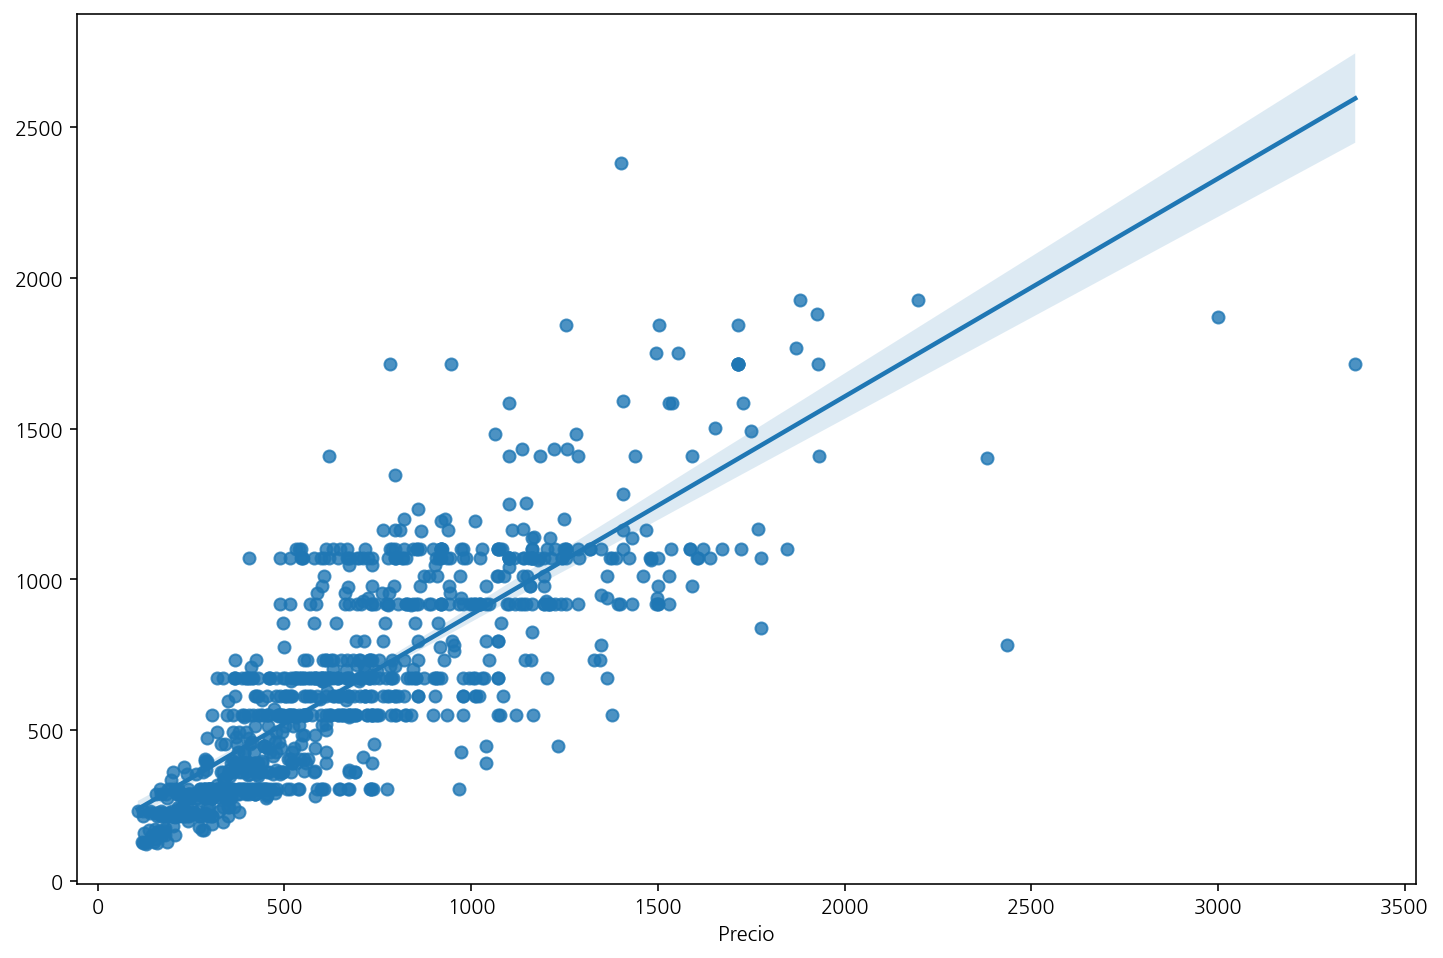

In [107]:
plt.figure(figsize=(12,8))
_=sns.regplot(x=y_train, y=y_valid_predict)

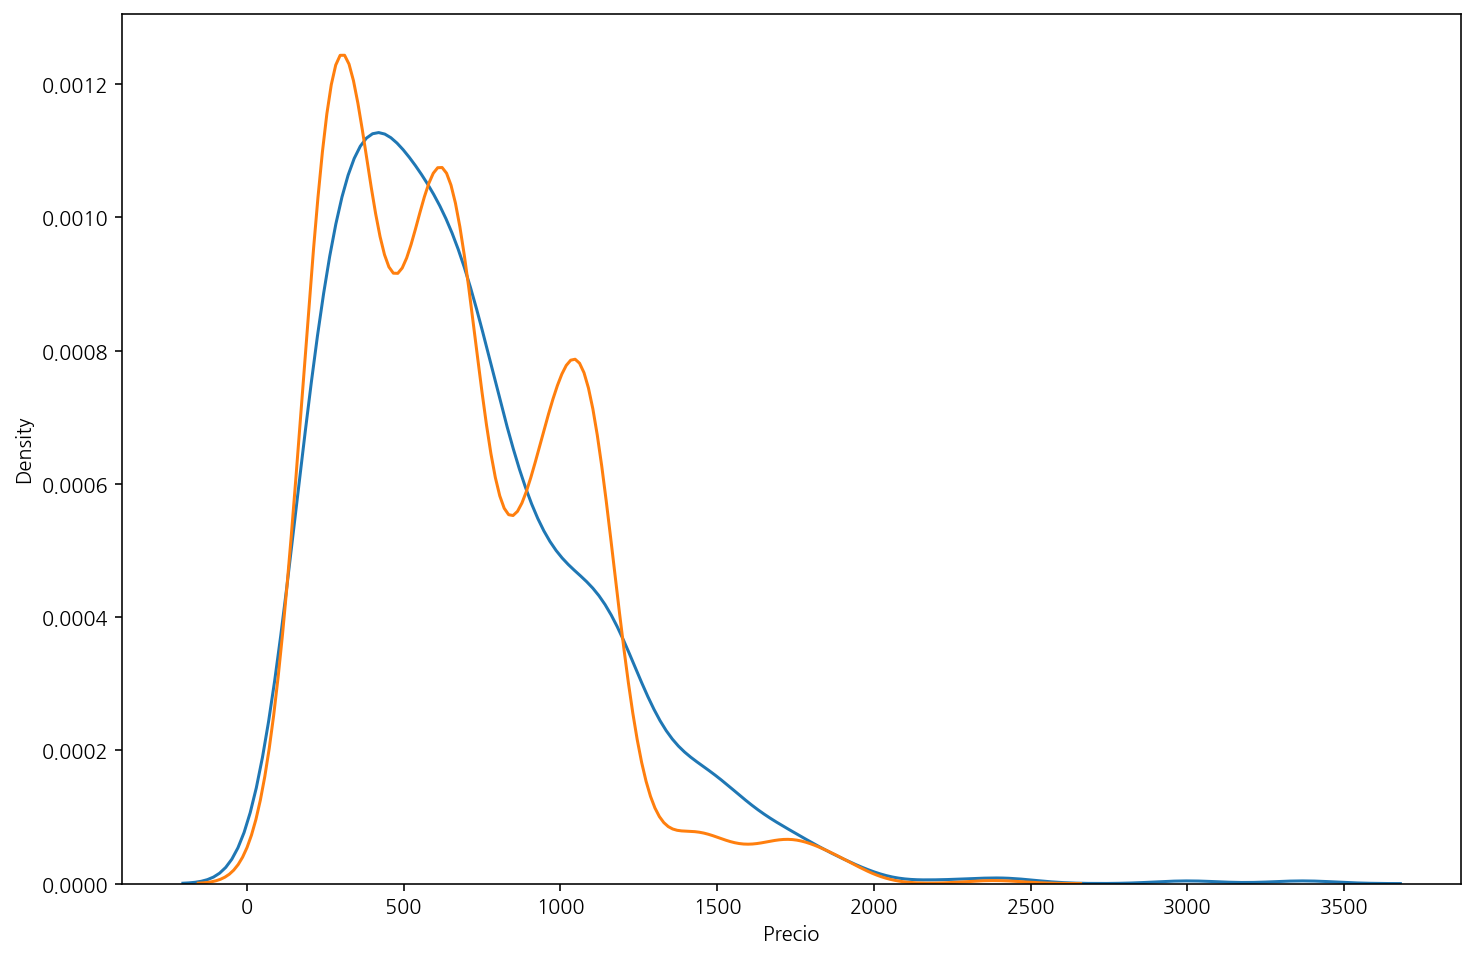

In [108]:
plt.figure(figsize=(12,8))
_=sns.kdeplot(y_train)
_=sns.kdeplot(y_valid_predict)

- best model

In [39]:
pd.DataFrame(cross_validate(best_model, X_train, y_train, cv=5))

,fit_time,score_time,test_score
0,0.460765,0.065824,0.031579
1,0.454812,0.066792,0.042105
2,0.449372,0.061867,0.042105
3,0.447827,0.063802,0.052632
4,0.536074,0.062858,0.042105


In [40]:
best_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=200)

In [41]:
pred = best_model.predict(X_test)
pred[:5]

array([226., 269., 673., 612., 226.])

- feature importance

In [76]:
fi = pd.DataFrame(best_model.feature_importances_)
fi.index = X_train.columns
fi.columns = ['Feature_Importances']
fi = fi.sort_values(by='Feature_Importances', ascending=False)
fi

,Feature_Importances
CPU,0.165976
Peso,0.144336
Disco,0.136136
GPU,0.123382
RAM,0.112027
ScreenResolution,0.089356
Fabricante,0.078142
OS,0.058388
Pulgadas,0.050126
Tipo,0.042130


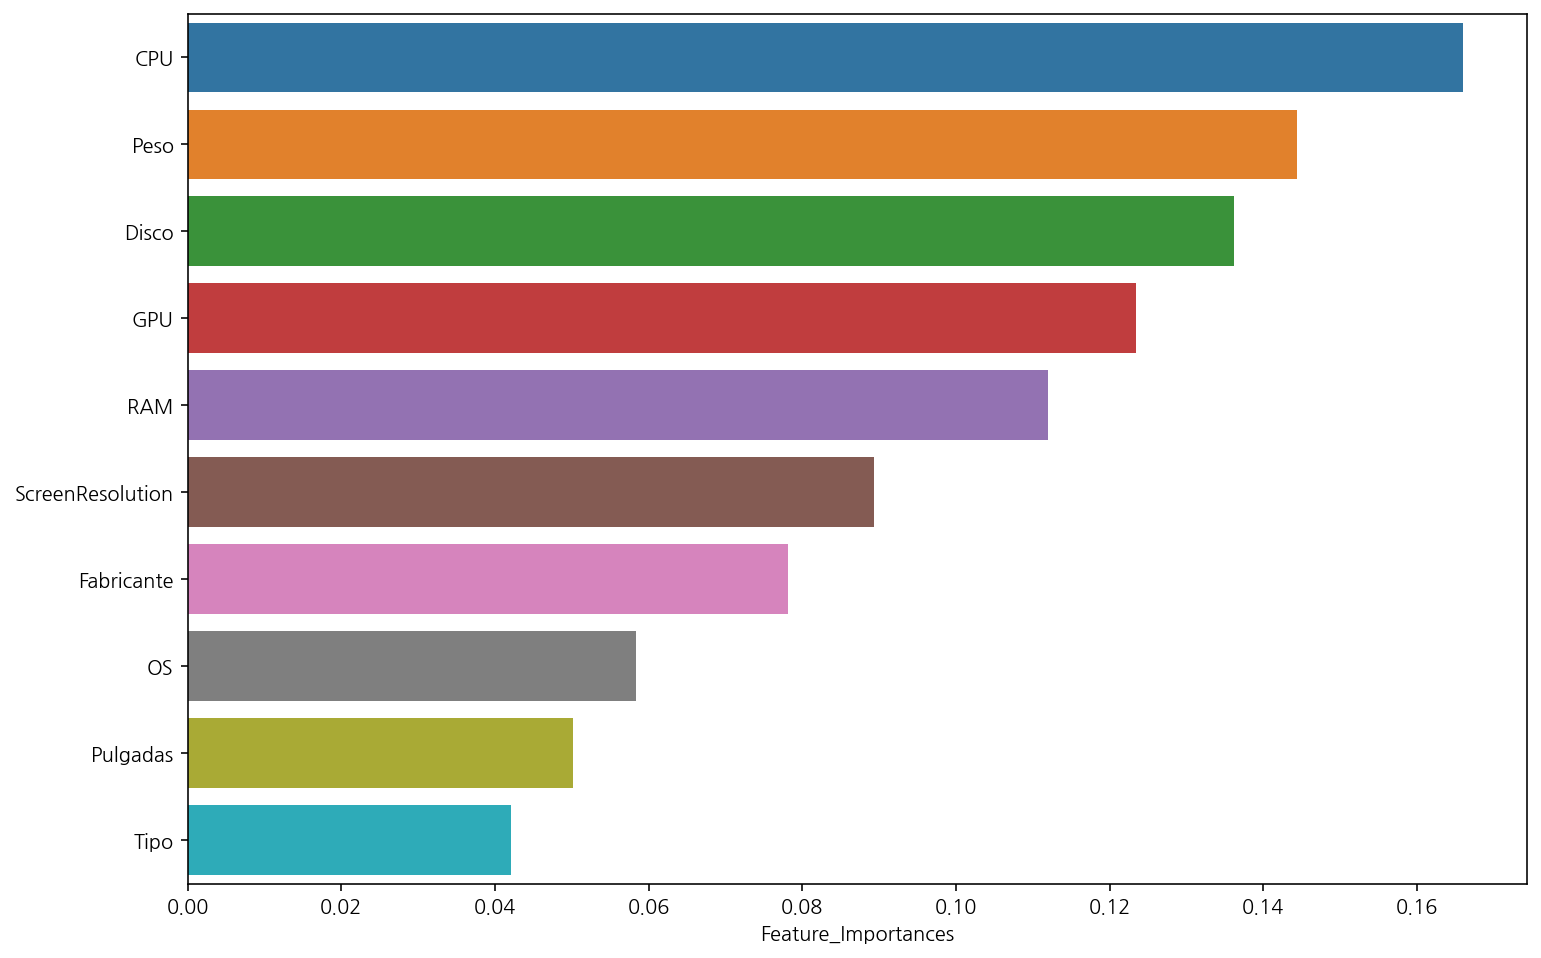

In [77]:
plt.figure(figsize=(12,8))
_=sns.barplot(x=fi['Feature_Importances'], y=fi.index)

# Submission

In [92]:
sub = pd.read_csv("sample.csv", index_col='Id')

In [94]:
sub['Precio'] = pred
sub

,Precio
Id,
950,226.0
951,269.0
952,673.0
953,673.0
954,226.0
...,...
1295,287.0
1296,446.0
1297,287.0


In [95]:
sub.to_csv("rfc_gscv.csv")

In [96]:
pd.read_csv("rfc_gscv.csv")

,Id,Precio
0,950,226.0
1,951,269.0
2,952,673.0
3,953,673.0
4,954,226.0
...,...,...
345,1295,287.0
346,1296,446.0
347,1297,287.0
348,1298,306.0
